# Sushmita Pal
## Enrolment id- 0017

#### Dataset

In [23]:
# Name: UpdatedResumeDataset.csv, Sample_resume.txt
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the dataset

In [59]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [60]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [61]:
print(df['Resume'])

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object


In [62]:
print(df['Resume'][945])

PERSONAL SKILLS â¢ Quick learner, â¢ Eagerness to learn new things, â¢ Competitive attitude, â¢ Good leadership qualities, â¢ Ability to deal with people diplomatically. PERSONAL DOSSIER Fathers Name: Dhanraj WaghEducation Details 
January 2012 to January 2016 Bachelors of Engineering Engineering Pune, Maharashtra Pune University
January 2012 Higher Secondary Certificate  Nashik, Maharashtra SND College of Engineering and Research Center
January 2010 Secondary School Certificate  Yeola, Maharashtra Swami Muktanand Jr. College
 HSC   Maharashtra State Board
 SSC   Maharashtra State Bard
 BE  Rajapur, Uttar Pradesh Madhyamik Vidya Mandir Rajapur
Testing and Quality Control Engineer 

Testing and Quality Control Engineer - M/S Rakesh Transformer Industries Pvt. Ltd
Skill Details 
Company Details 
company - M/S Rakesh Transformer Industries Pvt. Ltd
description - Responsibilities:
â¢     To conduct Routine test, Type Test (Temperature Rise Test), Special Test on Transformers as per I

#### Seperate the input and output data

In [63]:
x = df['Resume']
y = df['Category']

In [64]:
set(y)           # types of jobs

{'Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing'}

In [65]:
len(set(y))

25

#### Explore the data

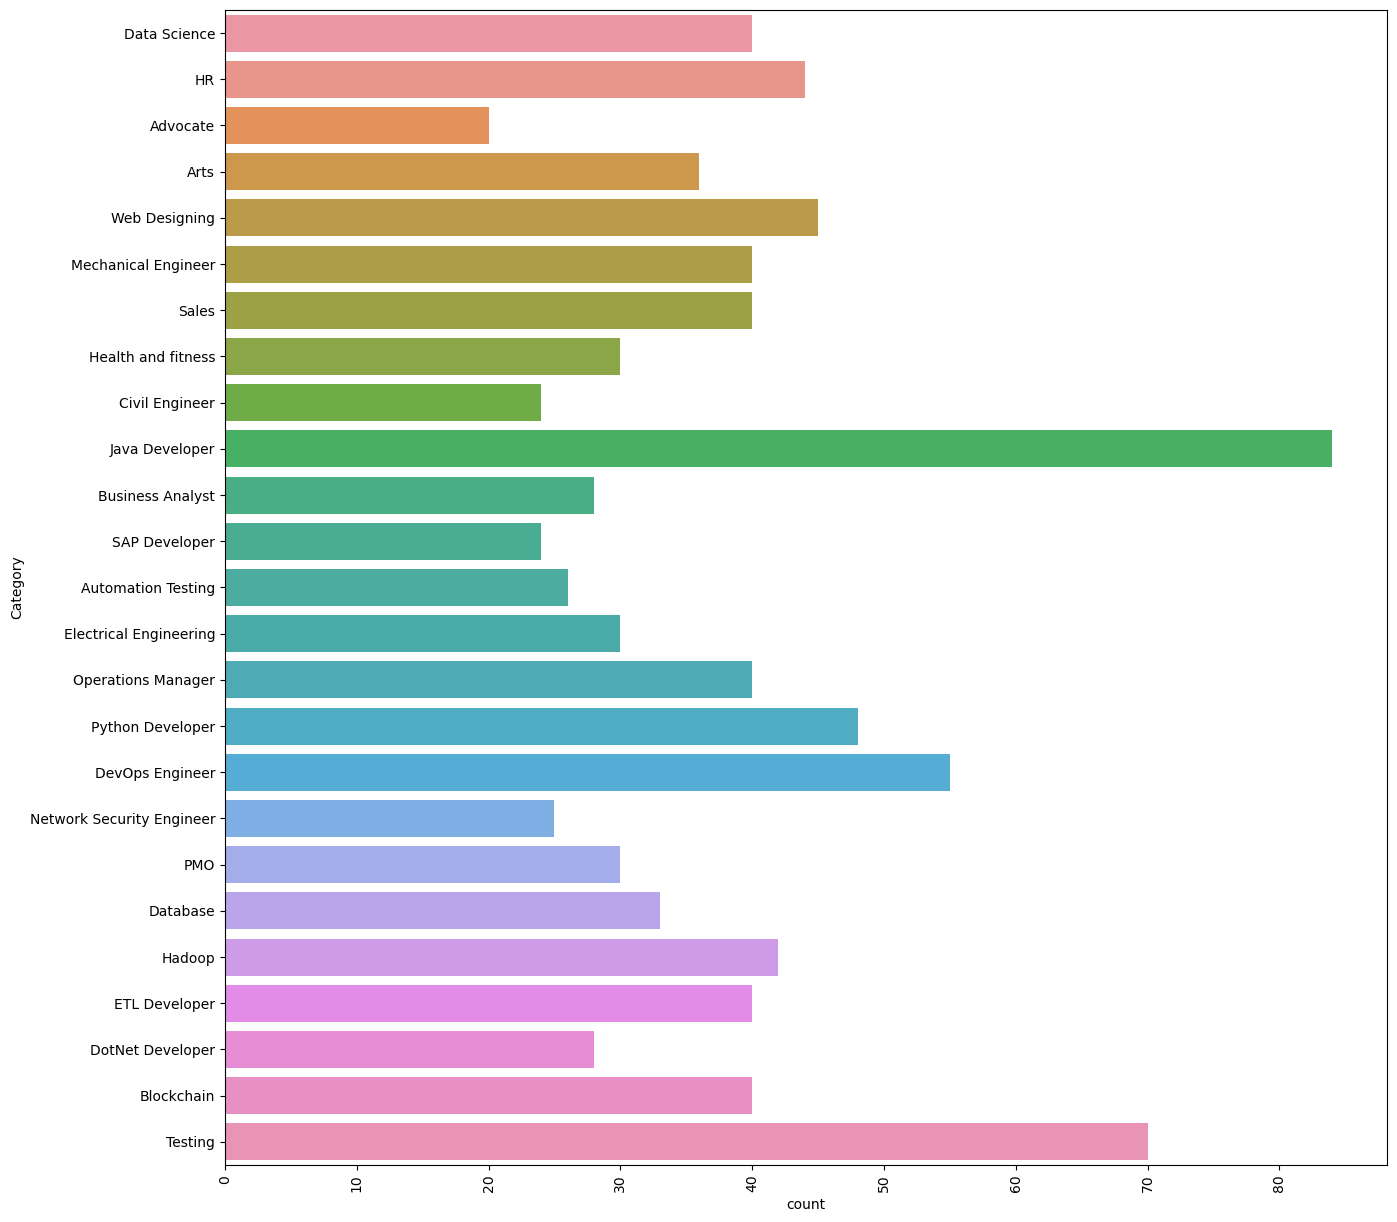

In [66]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=(90))
sns.countplot(y=df['Category']);

In [67]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

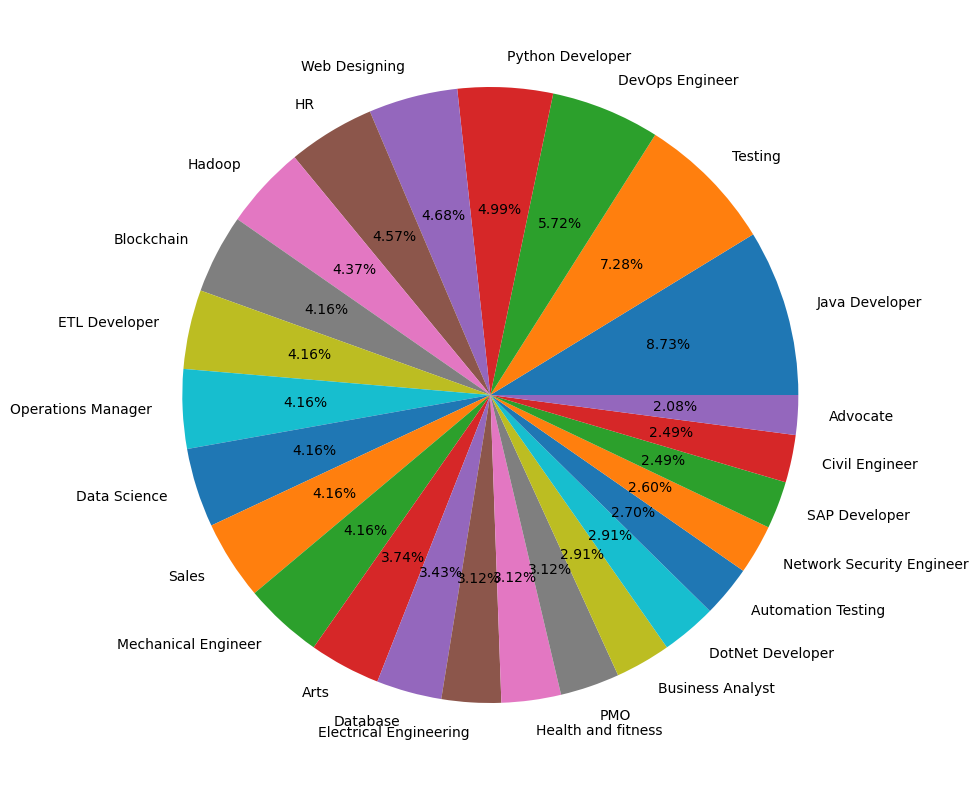

In [68]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

#### Data Preperation

##### Data Cleaning

In [69]:
import re, string

In [70]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
def cleanResume(resumeText):
    resumeText = re.sub('https\S+\s*','',resumeText)  # remove URLs
    resumeText = re.sub('RT|cc',' ', resumeText)     # remove RT and cc
    resumeText = re.sub('#\S+',' ', resumeText)     # remove hashtags
    resumeText = re.sub('@\S+',' ', resumeText)     # remove mentions
    resumeText = re.sub('[%s]' %  re.escape(string.punctuation), ' ', resumeText)
    # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove unicode charecters
    resumeText = re.sub('\s+',' ', resumeText)
    # remove extra whitespace
    return resumeText

In [86]:
name = 'Sushmita'

In [87]:
print('%s' %name)

Sushmita


In [88]:
cleanResume(df['Resume'][945])

'PERSONAL SKILLS Quick learner Eagerness to learn new things Competitive attitude Good leadership qualities Ability to deal with people diplomatically PERSONAL DOSSIER Fathers Name Dhanraj WaghEducation Details January 2012 to January 2016 Bachelors of Engineering Engineering Pune Maharashtra Pune University January 2012 Higher Secondary Certificate Nashik Maharashtra SND College of Engineering and Research Center January 2010 Secondary School Certificate Yeola Maharashtra Swami Muktanand Jr College HSC Maharashtra State Board SSC Maharashtra State Bard BE Rajapur Uttar Pradesh Madhyamik Vidya Mandir Rajapur Testing and Quality Control Engineer Testing and Quality Control Engineer M S Rakesh Transformer Industries Pvt Ltd Skill Details Company Details company M S Rakesh Transformer Industries Pvt Ltd description Responsibilities To conduct Routine test Type Test Temperature Rise Test Special Test on Transformers as per IS IEC up to 10 MVA 33 KV Class preparing of its test reports Routi

#### Seperate the input and output variables

In [89]:
x = df['Resume']
y = df['Category']

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tfidf = TfidfVectorizer(stop_words='english')

In [92]:
cleaned = x.apply(lambda a: cleanResume(a))

In [93]:
cleaned

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [99]:
# cleaned text is now  vectorized

In [100]:
x_vect = tfidf.fit_transform(cleaned)

In [105]:
x_vect.shape  # 7354 is the unique words we get

(962, 7354)

In [106]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

#### Cross Validation

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)

In [109]:
x_train.shape

(721, 7354)

In [110]:
x_test.shape

(241, 7354)

#### Build the model

In [111]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# create the object
knn = KNeighborsClassifier() # k nearnest neighbors

In [115]:
# train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Performance Evaluation

In [116]:
y_pred = knn.predict(x_test)

In [119]:
y_pred             # the accuracy of the model is given(predicted)

array(['Python Developer', 'Health and fitness', 'Java Developer',
       'Network Security Engineer', 'Java Developer',
       'Health and fitness', 'ETL Developer', 'Health and fitness',
       'Java Developer', 'Electrical Engineering', 'Data Science',
       'Testing', 'Business Analyst', 'Electrical Engineering', 'Hadoop',
       'Business Analyst', 'PMO', 'DevOps Engineer', 'DevOps Engineer',
       'DotNet Developer', 'HR', 'Electrical Engineering',
       'Network Security Engineer', 'Sales', 'PMO', 'Mechanical Engineer',
       'Civil Engineer', 'DevOps Engineer', 'Blockchain', 'Web Designing',
       'Python Developer', 'Operations Manager', 'Sales', 'Database',
       'Testing', 'Testing', 'Sales', 'Operations Manager', 'Database',
       'Python Developer', 'ETL Developer', 'Python Developer',
       'Health and fitness', 'DevOps Engineer', 'Java Developer',
       'Java Developer', 'DevOps Engineer', 'Electrical Engineering',
       'Business Analyst', 'Sales', 'Arts', 'We

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

<Figure size 1500x1500 with 0 Axes>

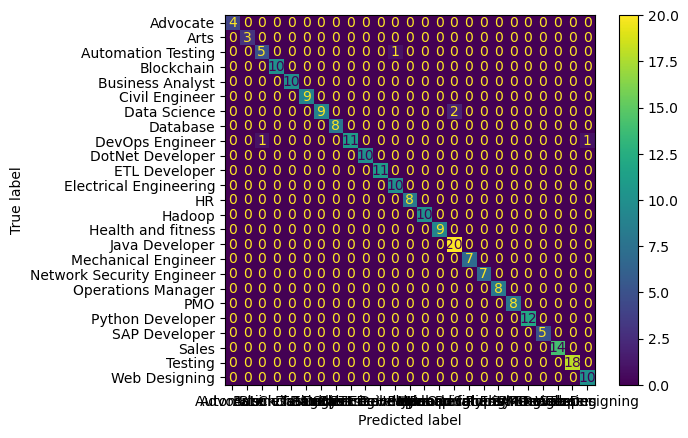

In [122]:
plt.figure(figsize = (15,15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [128]:
accuracy_score(y_test,  y_pred) *100  # percent of correct accuracy

97.9253112033195

In [129]:
236 / 241

0.979253112033195

#### Predict on unseen/new data

In [131]:
# Sample_resume.txt
# Predict the suitable job profile for this single resume.

In [132]:
f = open('sample_resume.txt')

In [133]:
data = f.read()

In [136]:
data_new = cleanResume(data)

In [137]:
data_clean= tfidf.transform([data_new])

In [138]:
data_clean.shape

(1, 7354)

In [139]:
knn.predict(data_clean)

array(['Data Science'], dtype=object)